Name: Saurav Karki
roll: 23bcs118

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
t = np.linspace(0, 1, 100)

In [3]:
def dsdx(x, s):
    y1, y2 = s
    return[y1 + y2**2 + 3*x,
            3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
s_0 = (y1_0, y2_0)

In [4]:
x = np.linspace(0, 1, 100)
sol = odeint(dsdx, y0=s_0, t = x, tfirst= True)

In [5]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

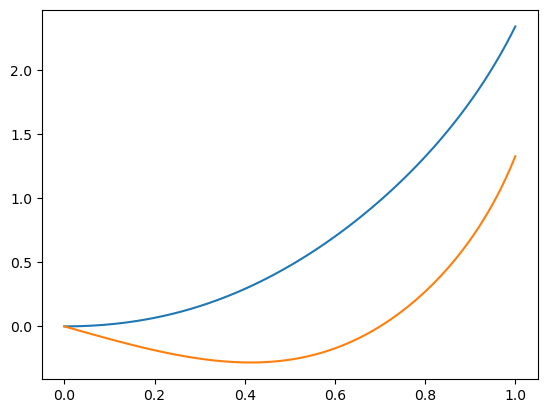

In [6]:
plt.plot(t, y1_sol)
plt.plot(t, y2_sol)

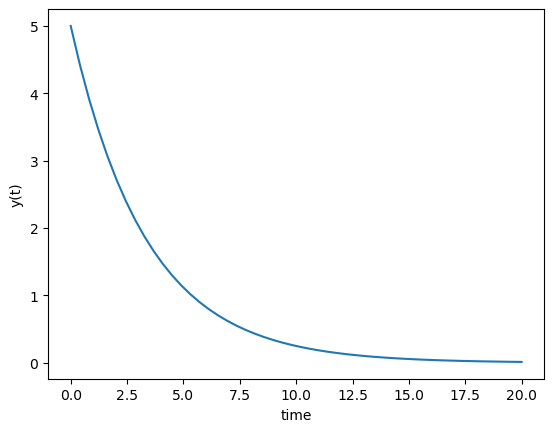

In [7]:
# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

$$\frac{dy(t)}{dt} = -y(t) + 1$$
$$y(0) = 0$$

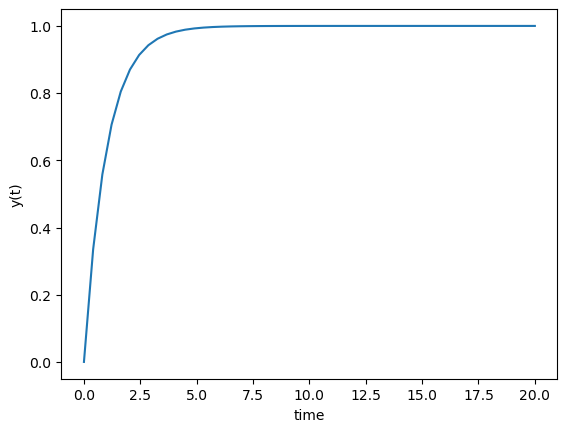

In [8]:
# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -y + 1
    return dydt

# initial condition
y0 = 0

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

$$5 \; \frac{dy(t)}{dt} = -y(t) + u(t)$$

$$y(0) = 1$$

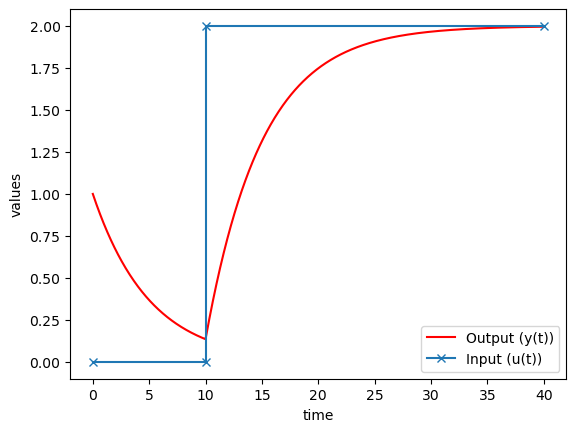

In [9]:
# function that returns dy/dt
def model(y,t):
    if t < 10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# initial condition
y0 = 1
# time points
t = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'x-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

Solve for `x(t)` and `y(t)` and show that the solutions are equivalent.
$$\frac{dx(t)}{dt} = 3 \; exp(-t)$$
$$\frac{dy(t)}{dt} = 3 - y(t)$$
 $$x(0) = 0$$
 $$y(0) = 0$$

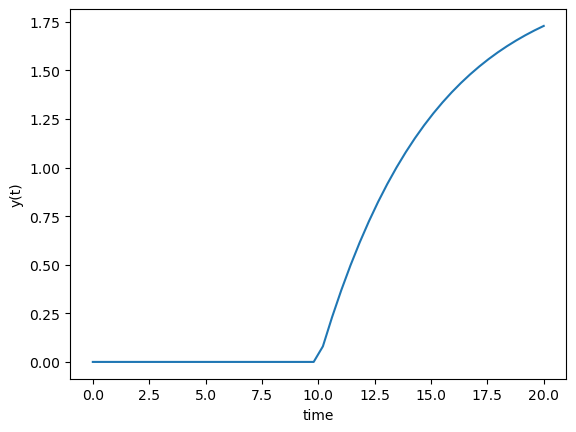

In [10]:
def model1(x,t):
    k = 0.3
    dxdt = -k * x
    return dxdt
def model2(y,t):
    k = 0.3
    dydt = -y + 1
    return dydt

# initial condition
y0 = 0


# initial condition
x0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

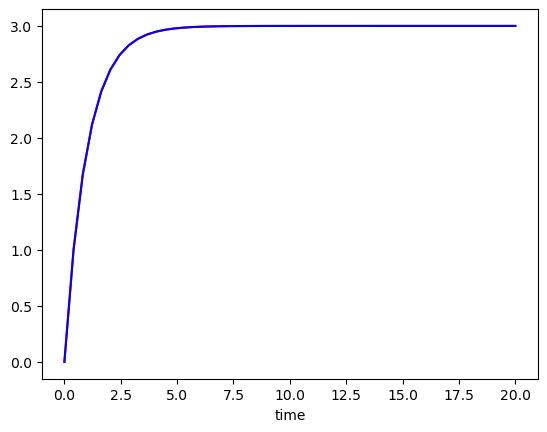

In [11]:
def dxdt(x, t):
    dxdt = 3.0*np.exp(-t)
    return dxdt

def dydt(y, t):
    dydt = 3 - y
    return dydt

x0 = 0
y0 = 0

t = np.linspace(0, 20)
x = odeint(dxdt, x0, t)
y = odeint(dydt, y0, t)

plt.plot(t, x, 'r')
plt.plot(t, y, 'b')
plt.xlabel('time')
plt.show()

$$2 \; \frac{dx(t)}{dt} = -x(t) + u(t)$$

$$5 \; \frac{dy(t)}{dt} = -y(t) + x(t)$$

$$u = 2 \, S(t-5), \; x(0) = 0, \; y(0) = 0$$

where `S(t-5)` is a step function that changes from zero to one at `t=5`. When it is multiplied by two, it changes from zero to two at that same time, `t=5`.

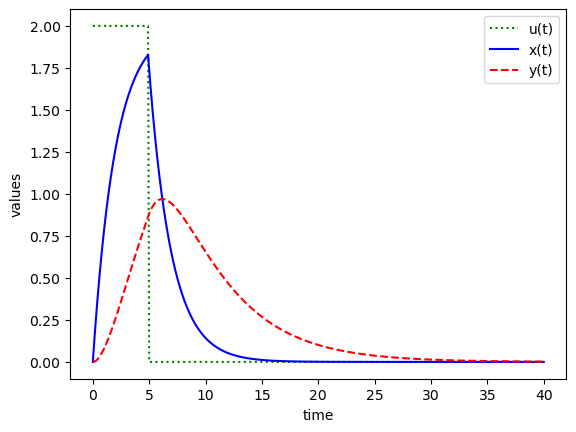

In [12]:
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

z0 = [0,0]

n = 401

t = np.linspace(0, 40, n)

u = np.zeros(n)
u[:50] = 2.0


x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()


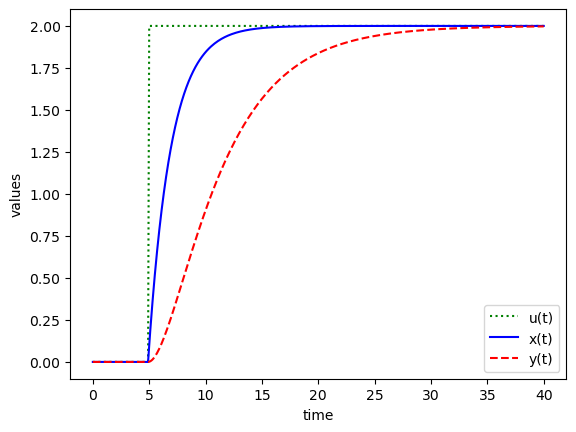

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[50:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

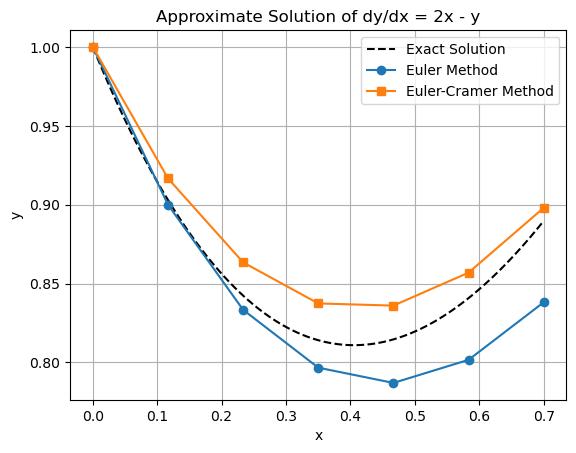

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the ODE dy/dx = f(x, y)
def f(y, x):
    return ((2*x)-y)

# Define the exact solution of the ODE
def exact_solution(x):
    return (-2*(x+1)+4)*np.exp(x)

# Euler method for solving the ODE
def euler_method(f, x0, y0, h, xmax):
    n = int((xmax - x0) / h)
    x_values = np.linspace(x0, xmax, n+1)
    y_values = np.zeros(n+1)
    y_values[0] = y0

    for i in range(1, n+1):
        y_values[i] = y_values[i-1] + h * f(y_values[i-1], x_values[i-1])

    return x_values, y_values

# Euler-Cramer method for solving the ODE
def euler_cramer_method(f, x0, y0, h, xmax):
    n = int((xmax - x0) / h)
    x_values = np.linspace(x0, xmax, n+1)
    y_values = np.zeros(n+1)
    y_values[0] = y0

    for i in range(1, n+1):
        y_star = y_values[i-1] + h * f(y_values[i-1], x_values[i-1])
        y_values[i] = y_values[i-1] + h * 0.5 * (f(y_values[i-1], x_values[i-1]) + f(y_star, x_values[i]))

    return x_values, y_values

# Define initial conditions and parameters
x0 = 0
y0 = 1
h = 0.1
xmax = 0.7

# Calculate solutions using Euler method and Euler-Cramer method
x_euler, y_euler = euler_method(f, x0, y0, h, xmax)
x_euler_cramer, y_euler_cramer = euler_cramer_method(f, x0, y0, h, xmax)

# Calculate exact solution using scipy's odeint function
x_exact = np.linspace(x0, xmax, 100)
y_exact = odeint(f, y0, x_exact)[:,0]

# Plot results
plt.plot(x_exact, y_exact, label='Exact Solution', linestyle='--', color='black')
plt.plot(x_euler, y_euler, label='Euler Method', marker='o')
plt.plot(x_euler_cramer, y_euler_cramer, label='Euler-Cramer Method', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximate Solution of dy/dx = 2x - y')
plt.legend()
plt.grid(True)
plt.show()